In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from tqdm.notebook import tqdm

plt.style.use('ggplot')

In [115]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = 'latin-1', header = None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
# to reduce to 500 rows for faster processing
df = df.head(500) 
print(df.shape)

(500, 6)


In [116]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [117]:
#first 10 tweets
for i, tweet in enumerate(df['text'].head(10)):
    print(f"{i+1}: {tweet}")

1: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
2: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
3: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
4: my whole body feels itchy and like its on fire 
5: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
6: @Kwesidei not the whole crew 
7: Need a hug 
8: @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
9: @Tatiana_K nope they didn't have it 
10: @twittera que me muera ? 


In [118]:
#to see the tokenizing
example = df['text'][50]
print(example)
print("\n")

tokens = nltk.word_tokenize(example)
print(tokens[:10])
print("\n")

#to see the pos
tagged = nltk.pos_tag(example)
print(tagged[:10])
print("\n")

#to see the NER
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

Broadband plan 'a massive broken promise' http://tinyurl.com/dcuc33 via www.diigo.com/~tautao Still waiting for broadband we are 


['Broadband', 'plan', "'a", 'massive', 'broken', 'promise', "'", 'http', ':', '//tinyurl.com/dcuc33']


[('B', 'NNP'), ('r', 'NN'), ('o', 'VBZ'), ('a', 'DT'), ('d', 'NN'), ('b', 'NN'), ('a', 'DT'), ('n', 'JJ'), ('d', 'NN'), (' ', 'NNP')]


(S
  B/NNP
  r/NN
  o/VBZ
  a/DT
  d/NN
  b/NN
  a/DT
  n/JJ
  d/NN
   /NNP
  p/NN
  l/NN
  a/DT
  n/JJ
   /NN
  '/''
  a/DT
   /JJ
  m/NN
  a/DT
  s/JJ
  s/NN
  i/NN
  v/VBP
  e/NN
   /NN
  b/NN
  r/NN
  o/NN
  k/NN
  e/FW
  n/JJ
   /NNP
  p/NN
  r/NN
  o/IN
  m/NN
  i/NN
  s/VBP
  e/NN
  '/''
   /JJ
  h/NN
  t/NN
  t/NN
  p/NN
  :/:
  //JJ
  //NNP
  t/NN
  i/NN
  n/VBP
  y/NN
  u/JJ
  r/NN
  l/NN
  ./.
  c/VB
  o/JJ
  m/NN
  //NNP
  d/NN
  c/NN
  u/JJ
  c/VBZ
  3/CD
  3/CD
   /JJ
  v/NN
  i/VBZ
  a/DT
   /JJ
  w/NN
  w/NN
  w/NN
  ./.
  d/NN
  i/NN
  i/VBP
  g/VBP
  o/NN
  ./.
  c/VB
  o/JJ
  m/NN
  //NNP
  ~/NNP
  t/V

# **VADER SENTIMENT ANALYSIS**

In [119]:
nltk.download('vader_lexicon')
analyze = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [120]:
#testing the vader sentiment analysis
print(analyze.polarity_scores('I am so happy'))
print(analyze.polarity_scores('I am so sad'))

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}
{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}


In [122]:
def polarity_scores_vader(text):
    scores = analyze.polarity_scores(text)
    scores_dict = {
        'vader_neg': scores['neg'],
        'vader_neu': scores['neu'],
        'vader_pos': scores['pos'],
        'vader_compound' : scores['compound']
    }
    return scores_dict

In [123]:
#running vader polarity scores on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try: 
        text = row['text']
        myid = row['id']
    #     direct way of doing it: res[myid] = analyze.polarity_scores(text)
        vader_results = polarity_scores_vader(text)
        res[myid] = vader_results
    except RunTimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [124]:
#creating a dataframe from the res dictionary
vaders_df = pd.DataFrame(res).T
vaders_df = vaders_df.reset_index().rename(columns={'index':'id'})
vaders_df = vaders_df.merge(df, how = 'left')

In [125]:
print(vaders_df.head())

           id  vader_neg  vader_neu  vader_pos  vader_compound  target  \
0  1467810369      0.129      0.745      0.126         -0.0173       0   
1  1467810672      0.303      0.697      0.000         -0.7500       0   
2  1467810917      0.000      0.833      0.167          0.4939       0   
3  1467811184      0.321      0.500      0.179         -0.2500       0   
4  1467811193      0.241      0.759      0.000         -0.6597       0   

                           date      flag             user  \
0  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I di

In [149]:
#to get the vader_sentiment column
vaders_df['vader_sentiment'] = vaders_df['vader_compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')


In [150]:
print(vaders_df.columns)
print(vaders_df[['id', 'vader_compound', 'vader_sentiment']].head())
print(vaders_df['vader_compound'].isnull().sum())

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'target',
       'date', 'flag', 'user', 'text', 'vader_sentiment'],
      dtype='object')
           id  vader_compound vader_sentiment
0  1467810369         -0.0173             neg
1  1467810672         -0.7500             neg
2  1467810917          0.4939             pos
3  1467811184         -0.2500             neg
4  1467811193         -0.6597             neg
0


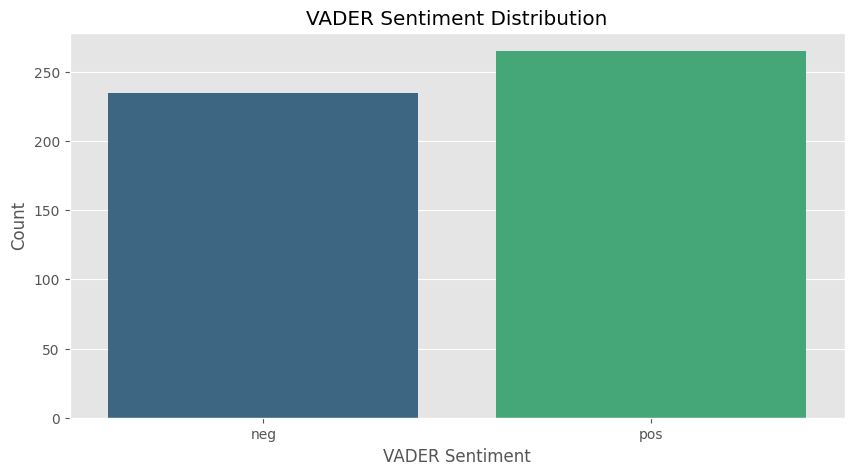

In [151]:
#visualization of the sentiments using vader
plt.figure(figsize=(10, 5))
sns.countplot(x='vader_sentiment', data=vaders_df, palette='viridis')
plt.title('VADER Sentiment Distribution')
plt.xlabel('VADER Sentiment')
plt.ylabel('Count')
plt.show()

# **ROBERTA SENTIMENT ANALYSIS**

In [106]:
#roberta analysis
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [107]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [108]:
#running the roberta model 
def polarity_scores_roberta(text):
    # make the text to tokens
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text) #**encoded_text unpacks the dictionary
    scores = output[0][0].detach().numpy()
    #softmax converts logits into probabilities that sum to 1
    #providing the models confidence in each class (pos.neg,neu)
    scores = softmax(scores) 
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [139]:
#running it on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['text']
        myid = row['id']
        vader_results = analyze.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_results.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_results = polarity_scores_roberta(text)
#         result[myid] = roberta_results
        both = {**vader_result_rename, **roberta_results}
        result[myid] = both
    except RunTimeError:
        print(f'Broke for id{myid}')
        

  0%|          | 0/500 [00:00<?, ?it/s]

In [140]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns = {'index' : 'id'})
results_df = results_df.merge(df, how = 'left')

In [141]:
print(results_df.head())

           id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0  1467810369      0.129      0.745      0.126         -0.0173     0.773734   
1  1467810672      0.303      0.697      0.000         -0.7500     0.932836   
2  1467810917      0.000      0.833      0.167          0.4939     0.146453   
3  1467811184      0.321      0.500      0.179         -0.2500     0.813473   
4  1467811193      0.241      0.759      0.000         -0.6597     0.945602   

   roberta_neu  roberta_pos  target                          date      flag  \
0     0.197483     0.028783       0  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1     0.061818     0.005346       0  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2     0.702749     0.150798       0  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3     0.163007     0.023521       0  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4     0.050249     0.004149       0  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                

In [142]:
#create a new column for roberta sentiment based on the highest score
results_df['roberta_sentiment'] = results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)
results_df['roberta_sentiment'] = results_df['roberta_sentiment'].map({
    'roberta_neg': 'negative',
    'roberta_neu': 'neutral',
    'roberta_pos': 'positive'
})

In [153]:
#showing vader sentiment in the new dictionary
results_df['vader_sentiment'] = results_df['vader_compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')


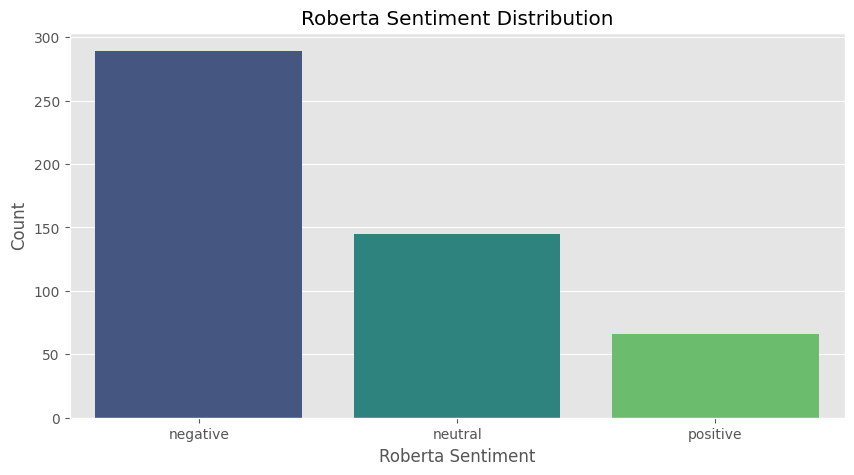

In [154]:
#visualizing the roberta sentiment distribution 
plt.figure(figsize = (10,5))
sns.countplot(x = 'roberta_sentiment', data=results_df, palette = 'viridis')
plt.title('Roberta Sentiment Distribution')
plt.xlabel('Roberta Sentiment')
plt.ylabel('Count')
plt.show()

# **COMPARISON BETWEEN BOTH**

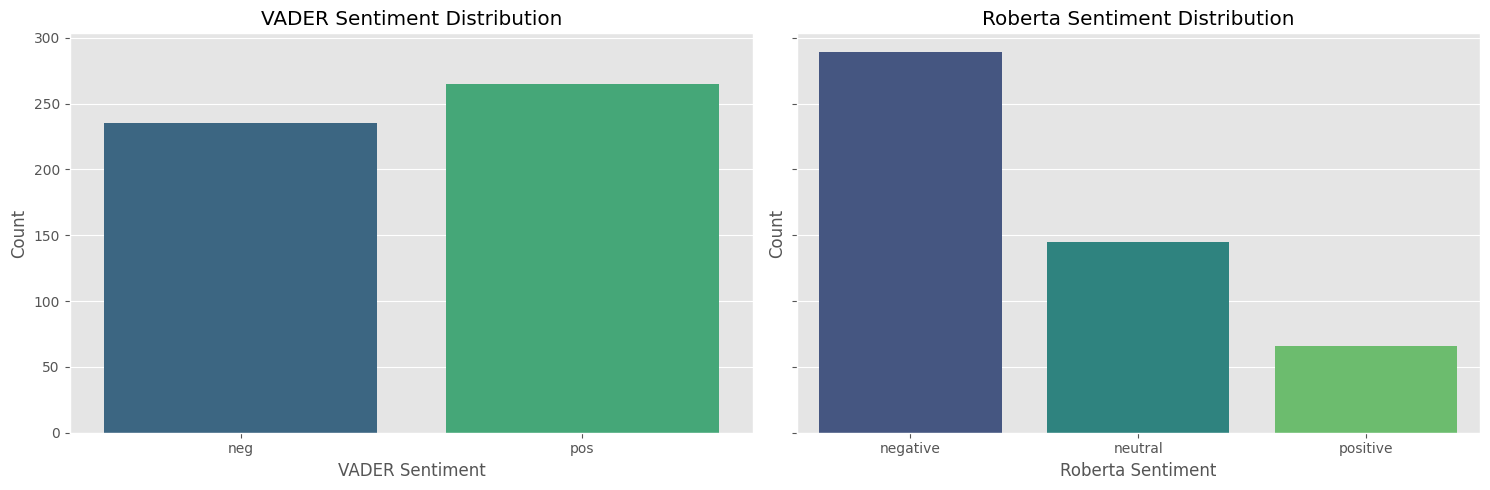

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.countplot(ax=axes[0], x='vader_sentiment', data=results_df, palette='viridis')
axes[0].set_title('VADER Sentiment Distribution')
axes[0].set_xlabel('VADER Sentiment')
axes[0].set_ylabel('Count')
sns.countplot(ax=axes[1], x='roberta_sentiment', data=results_df, palette='viridis')
axes[1].set_title('Roberta Sentiment Distribution')
axes[1].set_xlabel('Roberta Sentiment')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()